In [63]:
import pandas as pd

In [64]:
df = pd.read_csv("train.csv")

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This article was published as a part of the Data Science Blogathon

Introduction
The problem of missing value is quite common in many real-life datasets. Missing value can bias the results of the machine learning models and/or reduce the accuracy of the model. This article describes what is missing data, how it is represented, and the different reasons for the missing data. Along with the different categories of missing data, it also details out different ways of handling missing values with examples and how to handle missing values in dataset.

The following topics are covered in this guide:

What Is Missing Data (Missing Values)?
How Missing Data/Values Are Represented In The Dataset?
Why Is Data Missing From The Dataset?
Types Of Missing Values
Missing Completely At Random (MCAR)
Missing At Random (MAR)
Missing Not At Random (MNAR)
Why Do We Need To Care About Handling Missing Data?
How To Handle Missing Values?
Checking for missing values
Figure Out How To Handle The Missing Data
Deleting the Missing values
Deleting the Entire Row
Deleting the Entire Column
Imputing the Missing Value
Replacing With Arbitrary Value
Replacing With Mean
Replacing With Mode
Replacing With Median
Replacing with Previous Value – Forward Fill
Replacing with Next Value – Backward Fill
Interpolation
Imputing Missing Values For Categorical Features
Impute the Most Frequent Value
Impute the Value “missing”, which treats it as a Separate Category
Imputation of Missing Values using sci-kit learn library
Univariate Approach
Multivariate Approach
Nearest Neighbors Imputations (KNNImputer)
Adding missing indicator to encode “missingness” as a feature
EndNote
What is a Missing Value?
Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.
Below is a sample of the missing data from the Titanic dataset. You can see the columns ‘Age’ and ‘Cabin’ have some missing values.
missing values
Image 1

 
How is Missing Value Represented In The Dataset?
In the dataset, blank shows the missing values.

In Pandas, usually, missing values are represented by NaN.

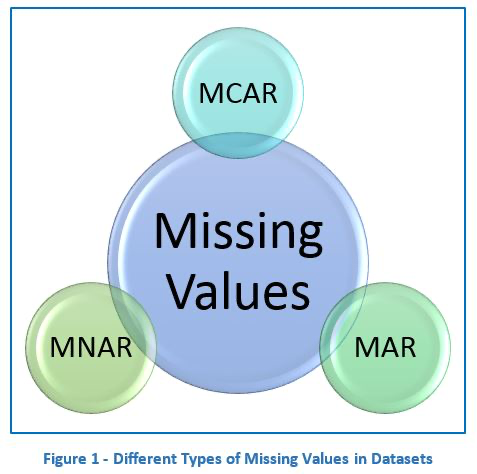

- Missing Completely At Random (MCAR)

    - In MCAR, the probability of data being missing is the same for all the observations.

    - In the case of MCAR, the data could be missing due to human error, some system/equipment failure, loss of sample, or some unsatisfactory technicalities while recording the values.

    - For Example, suppose in a library there are some overdue books. Some values of overdue books in the computer system are missing. The reason might be a human error like the librarian forgot to type in the values. So, the missing values of overdue books are not related to any other variable/data in the system
    
- Missing At Random (MAR)
    - Relation in missing data and other values
    - For example, if you check the survey data, you may find that all the people have answered their ‘Gender’ but ‘Age’ values are mostly missing for people who have answered their ‘Gender’ as ‘female’. (The reason being most of the females don’t want to reveal their age.)
    
- Missing Not At Random (MNAR)
    - If there is some structure/pattern in missing data and other observed data can not explain it, then it is Missing Not At Random (MNAR).
    - If the missing data does not fall under the MCAR or MAR then it can be categorized as MNAR.
    - It can happen due to the reluctance of people in providing the required information. A specific group of people may not answer some questions in a survey.

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [15]:
df[df.isnull().sum(axis=1)>1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [18]:
df.drop(['Cabin'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [20]:
df.fillna(df.Age.mean())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.699118,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,29.699118,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,29.699118,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [22]:
df.fillna(method='ffill')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
df.fillna(method='bfill')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,C148,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
from sklearn.impute import SimpleImputer


In [25]:
imputer = SimpleImputer(strategy='most_frequent')


In [26]:
imputer.fit_transform(df)


array([[1, 0, 3, ..., 7.25, 'B96 B98', 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, 'B96 B98', 'S'],
       ...,
       [889, 0, 3, ..., 23.45, 'B96 B98', 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, 'B96 B98', 'Q']], dtype=object)

In [27]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')


In [28]:
imputer.fit_transform(df)


array([[1, 0, 3, ..., 7.25, 'missing', 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, 'missing', 'S'],
       ...,
       [889, 0, 3, ..., 23.45, 'missing', 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, 'missing', 'Q']], dtype=object)

Imputation of Missing Value Using sci-kit learn Library


In [29]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')


In [32]:
imp.fit_transform(df[['Age']])


array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

In [33]:
cols = ['SibSp', 'Fare', 'Age']
X = df[cols]

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
impute_it.fit_transform(X)

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       ...,
       [ 1.        , 23.45      , 26.82938751],
       [ 0.        , 30.        , 26.        ],
       [ 0.        ,  7.75      , 32.        ]])

Nearest Neighbors Imputations (KNNImputer)



In [35]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(X)

array([[ 1.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 0.    ,  7.925 , 26.    ],
       ...,
       [ 1.    , 23.45  , 29.    ],
       [ 0.    , 30.    , 26.    ],
       [ 0.    ,  7.75  , 32.    ]])

In the above example, the n_neighbors=2. So sci-kit learn finds the two most similar rows measured by how close the ‘Sib sp’ and ‘Fare’ values are to the row which has missing values. In this case, the last row has a missing value. And the third row and the fifth row have the closest values for the other two features. So the average of the ‘Age’ feature from these two rows is taken as the imputed value.

Adding missing indicator to encode “missingness” as a feature


In [38]:
from sklearn.impute import SimpleImputer
# impute the mean
imputer = SimpleImputer()
imputer.fit_transform(df[['Age']])

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

In [39]:
imputer = SimpleImputer(add_indicator=True)
imputer.fit_transform(df[['Age']])

array([[22.        ,  0.        ],
       [38.        ,  0.        ],
       [26.        ,  0.        ],
       ...,
       [29.69911765,  1.        ],
       [26.        ,  0.        ],
       [32.        ,  0.        ]])

# Outlier

5. Handling Outliers
Till now we learned about detecting the outliers. The main question is how to deal with outliers?

Below are some of the methods of treating the outliers

Trimming/removing the outlier
Quantile based flooring and capping
Mean/Median imputation

5.1 Trimming/Remove the outliers
In this technique, we remove the outliers from the dataset. Although it is not a good practice to follow.

In [40]:
df.Age.box_plot()

AttributeError: 'Series' object has no attribute 'box_plot'

In [47]:
df.Age.mean()

29.69911764705882

In [48]:
df['Age'] = df.Age.fillna(df.Age.mean())

In [49]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(list(df.Age))
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 55.0, 55.0, 55.5, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]


In [51]:
# Trimming
for i in sample_outliers:
    a = np.delete(list(df.Age), np.where(list(df.Age)==i))
print(a)
# print(len(sample), len(a))

[22.         38.         26.         35.         35.         29.69911765
 54.          2.         27.         14.          4.         58.
 20.         39.         14.         55.          2.         29.69911765
 31.         29.69911765 35.         34.         15.         28.
  8.         38.         29.69911765 19.         29.69911765 29.69911765
 40.         29.69911765 29.69911765 66.         28.         42.
 29.69911765 21.         18.         14.         40.         27.
 29.69911765  3.         19.         29.69911765 29.69911765 29.69911765
 29.69911765 18.          7.         21.         49.         29.
 65.         29.69911765 21.         28.5         5.         11.
 22.         38.         45.          4.         29.69911765 29.69911765
 29.         19.         17.         26.         32.         16.
 21.         26.         32.         25.         29.69911765 29.69911765
  0.83       30.         22.         29.         29.69911765 28.
 17.         33.         16.         29.69

In [53]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(df.Age, 10)
ninetieth_percentile = np.percentile(df.Age, 90)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(df.Age>ninetieth_percentile, ninetieth_percentile, df.Age)
# print("Sample:", sample)
print("New array:",b)

New array: [22.         38.         26.         35.         35.         29.69911765
 47.          2.         27.         14.          4.         47.
 20.         39.         14.         47.          2.         29.69911765
 31.         29.69911765 35.         34.         15.         28.
  8.         38.         29.69911765 19.         29.69911765 29.69911765
 40.         29.69911765 29.69911765 47.         28.         42.
 29.69911765 21.         18.         14.         40.         27.
 29.69911765  3.         19.         29.69911765 29.69911765 29.69911765
 29.69911765 18.          7.         21.         47.         29.
 47.         29.69911765 21.         28.5         5.         11.
 22.         38.         45.          4.         29.69911765 29.69911765
 29.         19.         17.         26.         32.         16.
 21.         26.         32.         25.         29.69911765 29.69911765
  0.83       30.         22.         29.         29.69911765 28.
 17.         33.         16.   

In [54]:
tenth_percentile

16.0

In [55]:
The data points that are lesser than the 10th percentile are replaced with the 10th percentile value and the data points that are greater than the 90th percentile are replaced with 90th percentile value.

SyntaxError: invalid syntax (3699605997.py, line 1)

In [ ]:
5.3 Mean/Median imputation


In [56]:
median = np.median(df.Age)# Replace with median
for i in sample_outliers:
    c = np.where(df.Age==i, 14, df.Age)
print("Sample: ", df.Age)
print("New array: ",c)
# print(x.dtype)

Sample:  0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64
New array:  [22.         38.         26.         35.         35.         29.69911765
 54.          2.         27.         14.          4.         58.
 20.         39.         14.         55.          2.         29.69911765
 31.         29.69911765 35.         34.         15.         28.
  8.         38.         29.69911765 19.         29.69911765 29.69911765
 40.         29.69911765 29.69911765 66.         28.         42.
 29.69911765 21.         18.         14.         40.         27.
 29.69911765  3.         19.         29.69911765 29.69911765 29.69911765
 29.69911765 18.          7.         21.         49.         29.
 65.         29.69911765 21.         28.5         5.         11.
 22.         38.         45.          4.         29.69911765 29.6991176

In [ ]:
df = df[df[‘hp’]< Upper_Whisker]


# Confusion Matrix

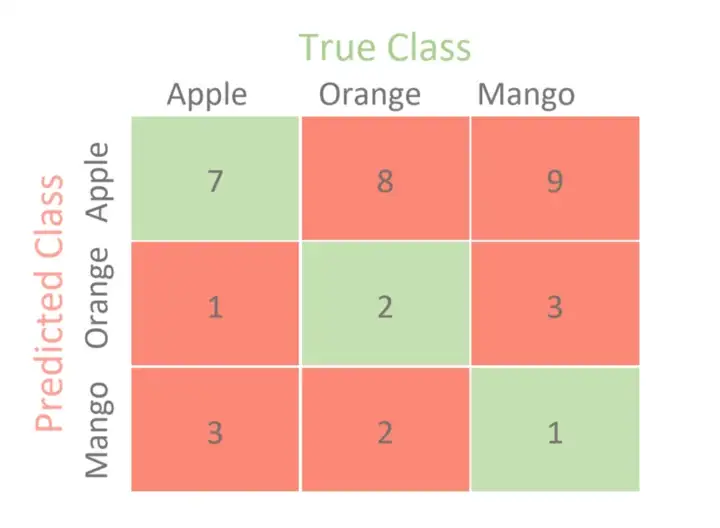

In [ ]:
Unlike binary classification, there are no positive or negative classes here. At first, it might be a little difficult to find TP, TN, FP and FN since there are no positive or negative classes, but it’s actually pretty easy. What we have to do here is to find TP, TN, FP and FN for each individual class. For example, if we take class Apple, then let’s see what are the values of the metrics from the confusion matrix.

TP = 7
TN = (2+3+2+1) = 8
FP = (8+9) = 17
FN = (1+3) = 4

In [ ]:
Since we have all the necessary metrics for class Apple from the confusion matrix, now we can calculate the performance measures for class Apple. For example, class Apple has

Precision = 7/(7+17) = 0.29
Recall = 7/(7+4) = 0.64
F1-score = 0.40

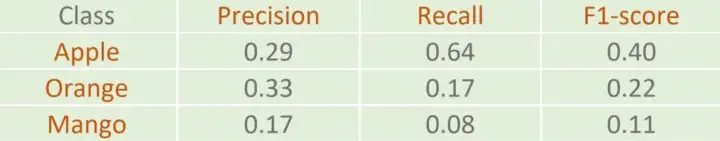

Micro F1
This is called micro-averaged F1-score. It is calculated by considering the total TP, total FP and total FN of the model. It does not consider each class individually, It calculates the metrics globally. So for our example,

In [57]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [58]:
data = sorted(df.Age)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
# print(q1, q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bou

In [59]:
lwr_bound

2.5

In [60]:
upr_bound

54.5

In [61]:
df = df[df.Age< upr_bound]


In [ ]:
Let’s say the exam is conducted in two shifts shift A and shift B and questions in shift A were relatively easy as compared to that of shift B. Because questions were relatively easy in shift A maximum marks scored by a candidate out of 300 in shift A is 280 and minimum is 80 on the other hand maximum and minimum marks scored by a candidate in shift B is 250 and 50 respectively.

So we cannot compare the score of a candidate who scored 150 in shift A to a candidate who scored the same in shift B

In [ ]:
The normalized score of a candidate who scored 150 in shift A will be calculated as follows

For simplicity sake let’s name it Xa

Xa =150-Xmin/(Xmin-Xmax)

Xmax = 280

Xmin = 80

Putting these values we get

Xa= 150–80/(280–80)

Xa =0.35

The normalized score of a candidate who scored 150 in shift B will be

For simplicity sake let’s name it Xb

Xb=150-Xmin/(Xmin-Xmax)

Xmax = 250

Xmin = 50

Putting these values we get

Xb = 150–50/(250–50)

Xb =0.5

Here we can see Xb>Xa

Total marks in CAT exam=300

If you want to compare out of 300 then

Xa *300 =105

Xb *300 = 150

In [ ]:
The standard deviation with mean = 0 and σ =1 is also known as standard normal distribution and is denoted by N(0,1).

Getting too technical, isn’t it?

Let’s solve an example for better understanding.

Let’s assume you and your friend study in different universities where the grading system is different. You get your score of 85 in a test. The mean grade of the class is 75 and a standard deviation of 5. Your friend got a grade of 615 and the mean grade of the class is 600 with a standard deviation of 50. How you are going to say who is performing better? As grade 85 can’t be compared to 615.

Here comes the role of standardization as it allows us to compare the scores with different metrics directly and make a statement about them.

Your Z score = 85–75/5 = 2

It means you are 2 standard deviations above the average grade.

Your friend’s Z score = 615–600/50 = 0.3

It means you are 0.3 standard deviations above the average grade.

By looking at standard scores you can clearly say that you are performing much better that he or she is the class.

Wasn’t that easy? I promised you.

Now the big question arises

In [ ]:
Which is better normalization or standardization?

Well, that depends on the type of data you are using.

Normalization is preferred over standardization when our data doesn’t follow a normal distribution. It can be useful in those machine learning algorithms that do not assume any distribution of data like the k-nearest neighbor and neural networks.

Standardization is good to use when our data follows a normal distribution. It can be used in a machine learning algorithm where we make assumptions about the distribution of data like linear regression etc

Point to be noted that unlike normalization, standardization doesn’t have a bounding range i.e. 0 to 1.

It’s also not influenced by maximum and minimum values in our data so if our data contains outliers it’s good to go.

Final words:

I hope you got a good idea about normalization and standardization. If you like my work then do appreciate me for posting more such good content related to statistics and data science. Please share it on social media platforms.

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])